# Algorithm Trading Basics

## 1. Importing and Refining Data

Importing all the necessary libraries.
Alpha_vintage library is used to get the financial data.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from alpha_vantage.timeseries import TimeSeries
import datetime

In [31]:
# ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')

In [38]:
stock_AAPL=pdr.get_data_yahoo('AAPL', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')
stock_MSFT=pdr.get_data_yahoo('MSFT',datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')
stock_F=pdr.get_data_yahoo('F', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')
stock_T=pdr.get_data_yahoo('T', datetime.date.today()-datetime.timedelta(2000), datetime.date.today()-datetime.timedelta(60), interval='d')
# stock_AAPL, metadata = ts.get_daily_adjusted('AAPL', outputsize='full')
# stock_MSFT, metadata = ts.get_daily_adjusted('MSFT', outputsize='full')
# stock_F, metadata = ts.get_daily_adjusted('F', outputsize='full')
# stock_T, metadata = ts.get_daily_adjusted('T', outputsize='full')
stock_T

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-06,35.730000,35.360001,35.560001,35.490002,22122900.0,26.316078
2014-10-07,35.610001,35.310001,35.529999,35.330002,21393600.0,26.197433
2014-10-08,35.169998,34.619999,34.919998,35.150002,25150700.0,26.407799
2014-10-09,35.220001,34.599998,35.099998,34.660000,21607500.0,26.039665
2014-10-10,34.799999,34.240002,34.759998,34.250000,28941200.0,25.731636
...,...,...,...,...,...,...
2020-01-23,38.990002,38.549999,38.959999,38.630001,29008000.0,38.630001
2020-01-24,38.779999,38.230000,38.599998,38.500000,34465300.0,38.500000
2020-01-27,38.570000,38.009998,38.020000,38.250000,35221600.0,38.250000


The Corona Virus has impacted the prices of each and every stock and hence I would remove the stock data from 8th Jan'20.

In [45]:
df_AAPL = pd.DataFrame(stock_AAPL)
df_MSFT = pd.DataFrame(stock_MSFT)
df_F = pd.DataFrame(stock_F)
df_T = pd.DataFrame(stock_T)

In [46]:
df_MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-06,46.299999,45.919998,46.119999,46.090000,20604000.0,41.006344
2014-10-07,45.930000,45.419998,45.860001,45.529999,25723700.0,40.508110
2014-10-08,46.889999,45.340000,45.480000,46.779999,33031000.0,41.620243
2014-10-09,46.799999,45.740002,46.500000,45.849998,34422800.0,40.792812
2014-10-10,46.119999,43.950001,45.599998,44.029999,51978100.0,39.173553


In [47]:
df_MSFT.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-23,166.800003,165.270004,166.190002,166.720001,19680800.0,166.265869
2020-01-24,167.529999,164.449997,167.509995,165.039993,24918100.0,164.590439
2020-01-27,163.380005,160.199997,161.149994,162.279999,32078100.0,161.837952
2020-01-28,165.759995,163.070007,163.779999,165.460007,24899900.0,165.009308
2020-01-29,168.750000,165.690002,167.839996,168.039993,34754500.0,167.582260


## 2. Exploratory Data Analysis

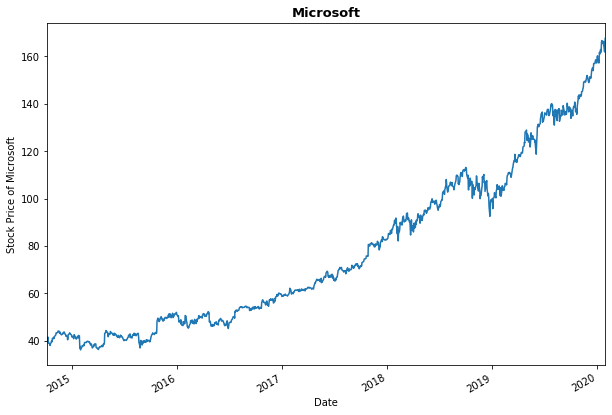

In [48]:
df_MSFT['Adj Close'].plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Stock Price of Microsoft')
plt.title('Microsoft',fontweight="bold",fontsize=13)
plt.show()

In [49]:
df_MSFT['Adj Close'].iloc[-1], df_MSFT['Adj Close'].iloc[0], df_MSFT['Adj Close'].iloc[1]

(167.58226013183594, 41.006343841552734, 40.50811004638672)

Getting all the data for Adjacent Closing price in one table.

In [50]:
df_Adj_Close = pd.concat([df_MSFT['Adj Close'], df_AAPL['Adj Close'], df_F['Adj Close'],df_T['Adj Close']], axis=1)
df_Adj_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_Adj_Close.head()

,MSFT,AAPL,Ford,AT&T
Date,,,,
2014-10-06,41.006344,90.921600,10.920219,26.316078
2014-10-07,40.508110,90.127571,10.604344,26.197433
2014-10-08,41.620243,91.998558,10.687074,26.407799
2014-10-09,40.792812,92.199371,10.408800,26.039665
2014-10-10,39.173553,91.934692,10.371198,25.731636


Normalizing the data and then comparing them. We are normalizing the data by dividing it by it's first trading price.  

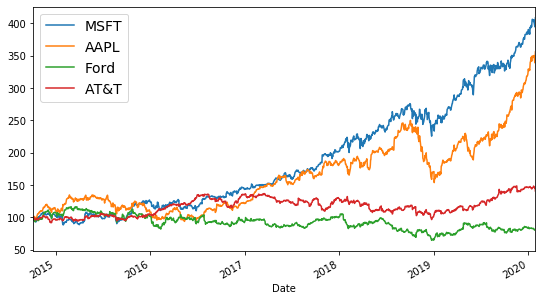

In [60]:
(df_Adj_Close / df_Adj_Close.iloc[0] *100).plot(figsize = (9 , 5));
plt.legend(loc=2, prop={'size': 14})
plt.show()

In [62]:
df_Open = pd.concat([df_MSFT['Open'], df_AAPL['Open'], df_F['Open'],df_T['Open']], axis=1)
df_Close = pd.concat([df_MSFT['Close'], df_AAPL['Close'], df_F['Close'],df_T['Close']], axis=1)
df_High = pd.concat([df_MSFT['High'], df_AAPL['High'], df_F['High'],df_T['High']], axis=1)
df_Low = pd.concat([df_MSFT['Low'], df_AAPL['Low'], df_F['Low'],df_T['Low']], axis=1)
df_Volume = pd.concat([df_MSFT['Volume'], df_AAPL['Volume'], df_F['Volume'],df_T['Volume']], axis=1)
df_Open.columns=['MSFT','AAPL','Ford','AT&T']
df_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_High.columns=['MSFT','AAPL','Ford','AT&T']
df_Low.columns=['MSFT','AAPL','Ford','AT&T']
df_Volume.columns=['MSFT','AAPL','Ford','AT&T']

Now we have the trading data for all the 4 companies in data frames.

In [63]:
df_Open

,MSFT,AAPL,Ford,AT&T
Date,,,,
2014-10-06,46.119999,99.949997,14.66,35.560001
2014-10-07,45.860001,99.430000,14.47,35.529999
2014-10-08,45.480000,98.760002,14.07,34.919998
2014-10-09,46.500000,101.540001,14.21,35.099998
2014-10-10,45.599998,100.690002,13.71,34.759998
...,...,...,...,...
2020-01-23,166.190002,317.920013,9.14,38.959999
2020-01-24,167.509995,320.250000,9.11,38.599998
2020-01-27,161.149994,310.059998,8.88,38.020000


<b>Moving Average</b>: 

In [64]:
df_MSFT['Window 40']=df_MSFT['Adj Close'].rolling(window=40).mean()

In [65]:
df_MSFT['Window 252']=df_MSFT['Adj Close'].rolling(window=252).mean()

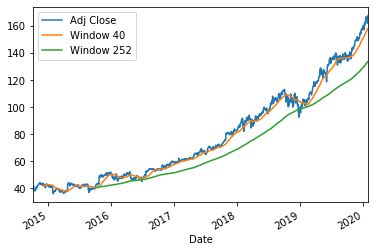

In [66]:
df_MSFT[['Adj Close', 'Window 40', 'Window 252']].plot()
plt.show()

<b>Volatility</b>: The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time

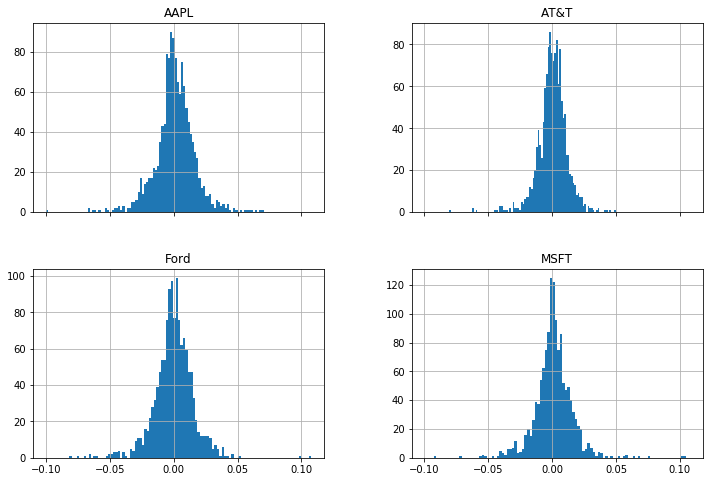

In [67]:
df_daily_pct_change = df_Adj_Close.pct_change()
df_daily_pct_change.hist(bins=100, sharex=True, figsize=(12,8))
plt.show()

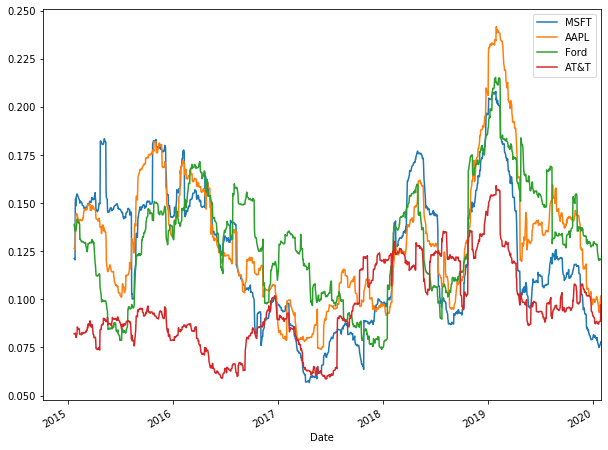

In [69]:
min_periods = 75 
vol = df_daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(10, 8))
plt.show()

## 3. Linear Modelling

Compiling the table for log(daily_returns)

In [70]:
import statsmodels.api as sm
df_log_returns=pd.DataFrame()
df_log_returns['MSFT'] = np.log(df_MSFT['Adj Close'] / df_MSFT['Adj Close'].shift(1) )
df_log_returns['AAPL'] = np.log(df_AAPL['Adj Close'] / df_AAPL['Adj Close'].shift(1) )
df_log_returns['F'] = np.log(df_F['Adj Close'] / df_F['Adj Close'].shift(1) )
df_log_returns['T'] = np.log(df_T['Adj Close'] / df_T['Adj Close'].shift(1))
df_log_returns=df_log_returns[1:]
df_log_returns

,MSFT,AAPL,F,T
Date,,,,
2014-10-07,-0.012225,-0.008771,-0.029352,-0.004519
2014-10-08,0.027084,0.020547,0.007771,0.007998
2014-10-09,-0.020081,0.002180,-0.026383,-0.014038
2014-10-10,-0.040504,-0.002875,-0.003619,-0.011900
2014-10-13,-0.008668,-0.009175,-0.018295,-0.012634
...,...,...,...,...
2020-01-23,0.006137,0.004804,-0.002186,-0.010558
2020-01-24,-0.010128,-0.002886,-0.015436,-0.003371
2020-01-27,-0.016865,-0.029846,-0.012297,-0.006515


In [71]:
X = sm.add_constant(df_log_returns['AAPL'])
model = sm.OLS(df_log_returns['MSFT'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     660.0
Date:                Sun, 29 Mar 2020   Prob (F-statistic):          1.32e-118
Time:                        02:34:12   Log-Likelihood:                 4025.3
No. Observations:                1337   AIC:                            -8047.
Df Residuals:                    1335   BIC:                            -8036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.656      0.0

C:\Users\chashah4\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


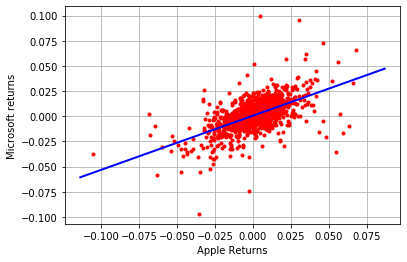

In [72]:
plt.plot(df_log_returns['AAPL'], df_log_returns['MSFT'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')
plt.show()

We can cross check our results by using rolling correlation of returns.

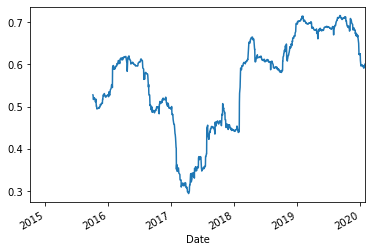

In [73]:
df_log_returns['MSFT'].rolling(window=252).corr(df_log_returns['AAPL']).plot()
plt.show()

## 4. Technical Indicators

### Dual Moving Crossover

Crossover occurs when a short-term average crosses a long-term average. When the short-term average crosses the long-term average, buy signal is triggered.

In [204]:
def Dual_Moving_Crossover(DF, short_window, long_window):
    signals=DF.copy()
    signals['short_mavg'] = df_AAPL['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_mavg'] = df_AAPL['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
    signals.dropna(inplace=True)
    return signals

In [205]:
DMC_signals = pd.DataFrame()
DMC_signals=(Dual_Moving_Crossover(df_AAPL,40,100))
print(DMC_signals)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2014-10-06  100.650002   99.419998   99.949997   99.620003  37051200.0   
2014-10-07  100.120003   98.730003   99.430000   98.750000  42094200.0   
2014-10-08  101.110001   98.309998   98.760002  100.800003  57404700.0   
2014-10-09  102.379997  100.610001  101.540001  101.019997  77376500.0   
2014-10-10  102.029999  100.300003  100.690002  100.730003  66331600.0   
...                ...         ...         ...         ...         ...   
2020-01-23  319.559998  315.649994  317.920013  319.230011  26118000.0   
2020-01-24  323.329987  317.519989  320.250000  318.309998  36634400.0   
2020-01-27  311.769989  304.880005  310.059998  308.950012  40485000.0   
2020-01-28  318.399994  312.190002  312.600006  317.690002  40558500.0   
2020-01-29  327.850006  321.380005  324.450012  324.339996  54057300.0   

             Adj Close  short_mavg   

In [206]:
DMC_signals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1338 entries, 2014-10-06 to 2020-01-29
Data columns (total 8 columns):
High          1338 non-null float64
Low           1338 non-null float64
Open          1338 non-null float64
Close         1338 non-null float64
Volume        1338 non-null float64
Adj Close     1338 non-null float64
short_mavg    1338 non-null float64
long_mavg     1338 non-null float64
dtypes: float64(8)
memory usage: 94.1 KB


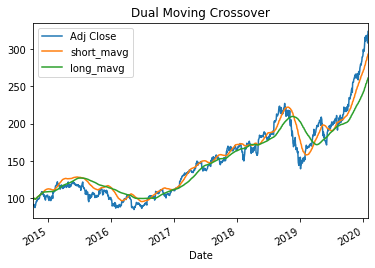

In [207]:
DMC_signals.iloc[:,[5,6,7]].plot(title="Dual Moving Crossover")

Not clear, coz a lot of date and hence we will look at the last 500 points.

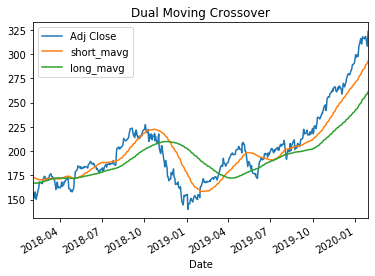

In [208]:
DMC_signals.iloc[-500:,[5,6,7]].plot(title="Dual Moving Crossover")

### MACD

Moving Average Convergence Divergence is a momentum indicator calculated by taking the difference of 2 moving averages of an asset price(Usually 12 period MA & 26 period MA). A signal line is also calculated by taking a moving average of the of the MACD line constructed above. <br>
The MACD line cutting the signal line from below indicates a bullish trend and the former cutting the latter from above indicates a bearish trend. This is called the crossover strategy. 

In [86]:
def MACD(DF,fast_window,slow_window,signal_window):
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=fast_window,min_periods=fast_window).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=slow_window,min_periods=slow_window).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=signal_window,min_periods=signal_window).mean()
    df.dropna(inplace=True)
    return df

In [87]:
MACD_signals = pd.DataFrame()
MACD_signals=(MACD(df_AAPL,12,26,9))
print(MACD_signals)    

                  High         Low        Open       Close      Volume  \
Date                                                                     
2014-11-20  116.860001  114.849998  114.910004  116.309998  43395500.0   
2014-11-21  117.570000  116.029999  117.510002  116.470001  57179300.0   
2014-11-24  118.769997  116.620003  116.849998  118.629997  47450800.0   
2014-11-25  119.750000  117.449997  119.070000  117.599998  68840400.0   
2014-11-26  119.099998  117.830002  117.940002  119.000000  40768300.0   
...                ...         ...         ...         ...         ...   
2020-01-23  319.559998  315.649994  317.920013  319.230011  26118000.0   
2020-01-24  323.329987  317.519989  320.250000  318.309998  36634400.0   
2020-01-27  311.769989  304.880005  310.059998  308.950012  40485000.0   
2020-01-28  318.399994  312.190002  312.600006  317.690002  40558500.0   
2020-01-29  327.850006  321.380005  324.450012  324.339996  54057300.0   

             Adj Close     MA_Fast   

<Figure size 432x288 with 0 Axes>

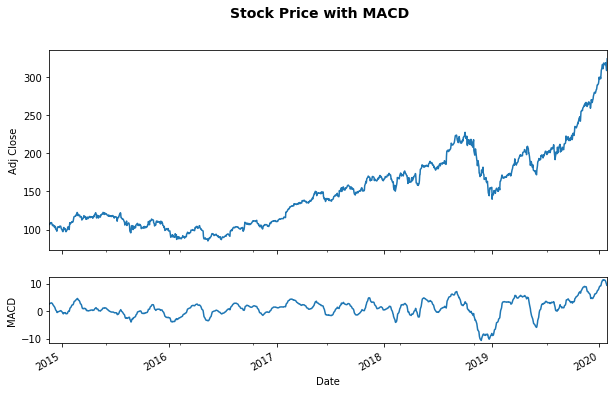

In [89]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[3,1]})
MACD_signals['Adj Close'].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
MACD_signals['MACD'].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD')
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')
plt.show()

### ATR and Bollinger Bands

Average True Range(ATR) and Bollinger Bands are Volatility Indicators.<br> Bollinger Bands comprises of 2 lines plotted 'n'(usually 2) standard deviations from a 'm'(usually 20) period simple moving average. The Bands widen during increase volatility and shrink during periods of reduced volatility.
<br> ATR measure volatility from the range perspective by taking the max of the difference of High and Low, High and Previous Day Close & Low and Previous Day Close.

In [90]:
def ATR(DF,n):
    df = DF.copy()
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Adj Close'].shift(1))
    df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    df2.dropna(inplace=True)
    return df2

In [91]:
ATR_signals = pd.DataFrame()
ATR_signals = (ATR(df_AAPL,20))
print(ATR_signals['ATR'])    

Date
2014-11-03    10.224408
2014-11-04    10.246604
2014-11-05    10.206606
2014-11-06    10.159293
2014-11-07    10.151814
                ...    
2020-01-23     5.355705
2020-01-24     5.547705
2020-01-27     5.862367
2020-01-28     6.078941
2020-01-29     6.251051
Name: ATR, Length: 1318, dtype: float64


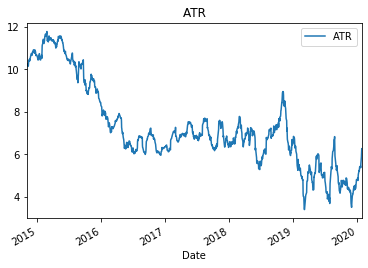

In [93]:
ATR_signals.iloc[:,[-1]].plot(title="ATR")

In [95]:
def BollBnd(DF,n):
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0)
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) 
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df
#ddof=0 is required since we want to take the standard deviation of the population and not sample

In [105]:
BollBnd_signals = pd.DataFrame()
BollBnd_signals=(BollBnd(df_AAPL,20))
print(BollBnd_signals['MA'])

Date
2014-10-31     93.111592
2014-11-03     93.557896
2014-11-04     94.007394
2014-11-05     94.375207
2014-11-06     94.747186
                 ...    
2020-01-23    304.114246
2020-01-24    305.812216
2020-01-27    306.761961
2020-01-28    308.153160
2020-01-29    309.790274
Name: MA, Length: 1319, dtype: float64


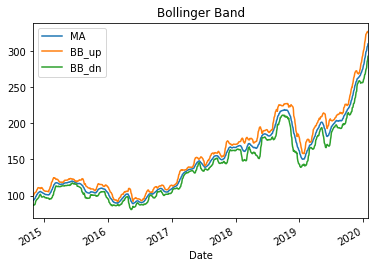

In [106]:
BollBnd_signals.iloc[:,[-4,-3,-2]].plot(title="Bollinger Band")

Not clear, coz a lot of date and hence we will look at the last 100 points.

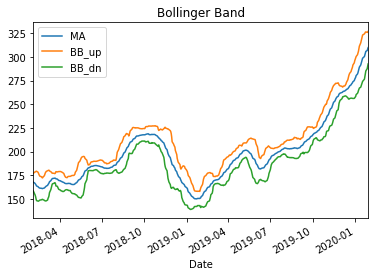

In [107]:
BollBnd_signals.iloc[-500:,[-4,-3,-2]].plot(title="Bollinger Band")

### RSI

Relative Strength Index is a momentum Oscillator which measures the speed and change of price movements. It's value oscillates between 0 and 100. <br>Above 70 means that the stock is overbought and hence price might decrease. <br> Below 30 means that the stock is oversold and hence price might increase. <br> Usually 70-30 is more developed economies, where as it is 80-20 for the developing economies like India. 

In [108]:
def RSI(DF,n):
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    df = df.drop(['delta','gain','loss','avg_gain','avg_loss','RS'],axis=1)
    df.dropna(inplace=True)
    return df

In [110]:
RSI_signals = pd.DataFrame()
RSI_signals=(RSI(df_AAPL,14))
print(RSI_signals['RSI'])

Date
2014-10-24    66.607385
2014-10-27    66.142584
2014-10-28    69.534643
2014-10-29    70.698379
2014-10-30    68.995581
                ...    
2020-01-23    76.413451
2020-01-24    74.522285
2020-01-27    58.625572
2020-01-28    65.933150
2020-01-29    70.240082
Name: RSI, Length: 1324, dtype: float64


<Figure size 432x288 with 0 Axes>

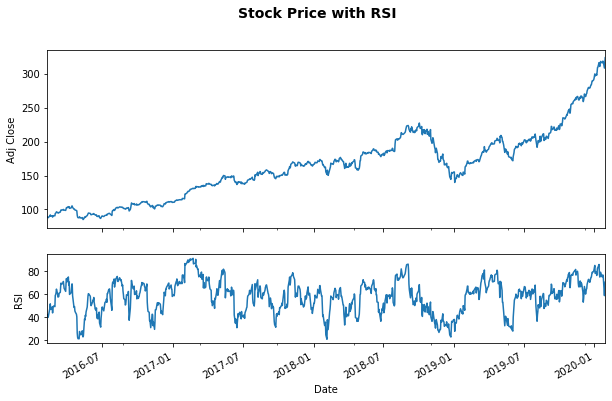

In [111]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
RSI_signals.iloc[-1000:,-2].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
RSI_signals.iloc[-1000:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='RSI')
fig.suptitle('Stock Price with RSI', fontsize=14, fontweight='bold')
plt.show()

### ADX

Average Directional Index(ADI) is a way of measuring the strenght of the trend. It is non-direcitonal; i.e, it does not tell the direction of the trend.
<br>0-25: Weak
<br>25-50: Good
<br>50-75: Strong Trend

In [112]:
def ADX(DF,n):
    df2 = DF.copy()
    df2 = ATR(df2,n)
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    df2 = df2.drop(['DMplus','DMminus','TRn','DMplusN','DMminusN','DIminusN','DIplusN','DIdiff','DIsum'],axis=1)
    df2.dropna(inplace=True)
    return df2

In [113]:
ADX_signals = pd.DataFrame()
ADX_signals=ADX(df_AAPL,14)
print(ADX_signals)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2014-12-03  116.349998  115.110001  115.750000  115.930000  43063400.0   
2014-12-04  117.199997  115.290001  115.769997  115.489998  42044500.0   
2014-12-05  116.080002  114.639999  115.989998  115.000000  38318900.0   
2014-12-08  114.650002  111.620003  114.099998  112.400002  57664900.0   
2014-12-09  114.300003  109.349998  110.190002  114.120003  60208000.0   
...                ...         ...         ...         ...         ...   
2020-01-23  319.559998  315.649994  317.920013  319.230011  26118000.0   
2020-01-24  323.329987  317.519989  320.250000  318.309998  36634400.0   
2020-01-27  311.769989  304.880005  310.059998  308.950012  40485000.0   
2020-01-28  318.399994  312.190002  312.600006  317.690002  40558500.0   
2020-01-29  327.850006  321.380005  324.450012  324.339996  54057300.0   

             Adj Close         TR    

<Figure size 432x288 with 0 Axes>

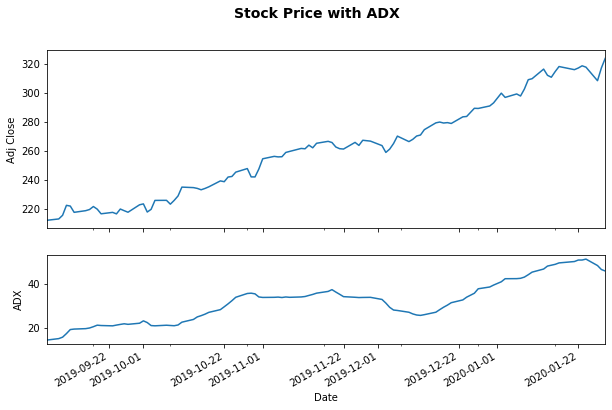

In [116]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
ADX_signals.iloc[-100:,-5].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
ADX_signals.iloc[-100:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='ADX')
fig.suptitle('Stock Price with ADX', fontsize=14, fontweight='bold')
plt.show()

### OBV

On Balance Volume(OBV) is a momentum indicator which uses changes in trading volume as an indicator of future asset price moves. It is based on the theory that volume precedes price movement.<br> Rising OBV reflects positive volume pressure that can lead to higher prices and falling OBV predicts decline in prices.


In [117]:
def OBV(DF):
    df = DF.copy()
    df['daily_return'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_return']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    df.dropna(inplace=True)
    return df

In [121]:
OBV_signals = pd.DataFrame()
OBV_signals=OBV(df_AAPL)
print(OBV_signals['obv'].max())

1116221400.0


C:\Users\chashah4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Slope

Slope is a momentum indicator without boundaries which measures the rise-over-run of a linear regression, which is the line of best fit for a price series. <br> It can fluctuate above and below zero. It can measure the direction and strength of a trend.

In [122]:
def slope(ser,n):
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y = ser[i-n:i]
        x = np.array(range(n))
        y_scaled = (y - y.min())/(y.max() - y.min())
        x_scaled = (x - x.min())/(x.max() - x.min())
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

In [127]:
slope_signal=df_AAPL.copy()
slope_signal['slope']=slope(df_AAPL['Adj Close'],5)
print(slope_signal['slope'],slope_signal['slope'].max(),slope_signal['slope'].min())

Date
2014-10-06     0.000000
2014-10-07     0.000000
2014-10-08     0.000000
2014-10-09     0.000000
2014-10-10    38.350796
                ...    
2020-01-23    34.866594
2020-01-24    15.305674
2020-01-27   -29.651183
2020-01-28   -21.839966
2020-01-29    14.009889
Name: slope, Length: 1338, dtype: float64 50.025222514666964 -49.55007720534156


<Figure size 432x288 with 0 Axes>

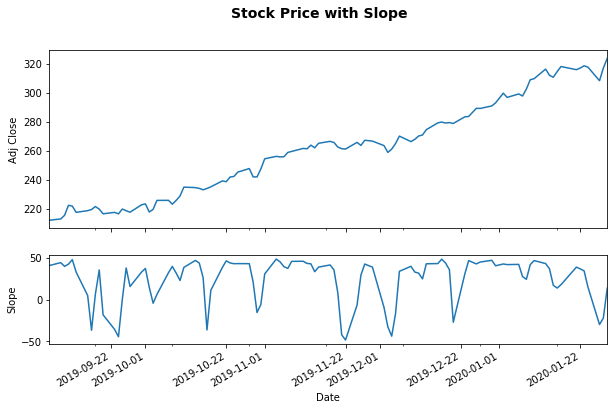

In [128]:
fig = plt.figure()
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2,1]})
slope_signal.iloc[-100:,-2].plot(ax=ax0)
ax0.set(ylabel='Adj Close')
slope_signal.iloc[-100:,-1].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Slope')
fig.suptitle('Stock Price with Slope', fontsize=14, fontweight='bold')
plt.show()

### Renko Chart

Renko Chart is built using price movements rather than price against standardized intervals, this filters our noise and lets us visualize a true trend.<br> Price movements are represented as bricks stacked 45 degrees to each other. A new brick is formed only when the price moves by a predetermined amount in either direction.<br> Renko chart have a time axis but the scale is not fixed. Some bricks may take more or less time to form than others.

In [129]:
from stocktrends import Renko

In [130]:
def renko_DF(DF):
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,5,6]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data()
    print(renko_df)
    return renko_df

In [131]:
renko_DF(df_AAPL)

          date   open   high    low  close  uptrend
0   2014-10-06   85.0   90.0   85.0   90.0     True
1   2014-10-23   90.0   95.0   90.0   95.0     True
2   2014-11-11   95.0  100.0   95.0  100.0     True
3   2014-11-18  100.0  105.0  100.0  105.0     True
4   2015-02-05  105.0  110.0  105.0  110.0     True
..         ...    ...    ...    ...    ...      ...
118 2020-01-08  295.0  300.0  295.0  300.0     True
119 2020-01-09  300.0  305.0  300.0  305.0     True
120 2020-01-13  305.0  310.0  305.0  310.0     True
121 2020-01-13  310.0  315.0  310.0  315.0     True
122 2020-01-29  315.0  320.0  315.0  320.0     True

[123 rows x 6 columns]


,date,open,high,low,close,uptrend
0,2014-10-06,85.0,90.0,85.0,90.0,True
1,2014-10-23,90.0,95.0,90.0,95.0,True
2,2014-11-11,95.0,100.0,95.0,100.0,True
3,2014-11-18,100.0,105.0,100.0,105.0,True
4,2015-02-05,105.0,110.0,105.0,110.0,True
...,...,...,...,...,...,...
118,2020-01-08,295.0,300.0,295.0,300.0,True
119,2020-01-09,300.0,305.0,300.0,305.0,True
120,2020-01-13,305.0,310.0,305.0,310.0,True
121,2020-01-13,310.0,315.0,310.0,315.0,True


## 5. Performance Measurment KPI's

### CAGR
### $$
CAGR =(EV/BV)^{1/n} -1
$$
<br>
EV = Investments ending value<br>
BV = Investment’s beginning value<br> 
n = the number of periods. 
 

In [237]:
def CAGR(df):
    df2=df.copy()
    days = (df2.index[-1] - df2.index[0]).days
    cagr = ((((df2['Adj Close'][-1]) / df2['Adj Close'][1])) ** (365.0/days)) - 1
    return cagr

In [238]:
print(CAGR(df_AAPL))

0.2717086301896465


### Volatility
Represented as the standard deviation of the returns. Assumes a Normal distribution and hence tail risk is ignored.

In [239]:
def volatility(df):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    vol=df2['daily returns'].std() * np.sqrt(252)
    return vol

In [240]:
print(volatility(df_AAPL))

0.24657172206566863


### Sharpe ratio
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$
<br>
$
r_{pg} = Return of a Portfolio
$
<br>
$
r_{f} = Risk-free Rate
$
<br>
$
sigma_{pg} = Standard Deviation of a Portfolio
$

In [241]:
def sharpe(df,rf):
    sharpe_ratio = (CAGR(df)-rf) / volatility(df)
    return sharpe_ratio

In [242]:
print(sharpe(df_AAPL,0.03))

0.9802771711399779


### Sortino ratio
It is a variation of Sharpe ratio where it accounts for only the negative deviations.

In [243]:
def sortino(df,rf):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    neg_vol=df2[df2['daily returns']<0]['daily returns'].std() * np.sqrt(252)
    sortino_ratio = (CAGR(df)-rf) /neg_vol
    return sortino_ratio

In [244]:
print(sortino(df_AAPL,0.03))

1.335024323680788


### Max Drawdown
It is the largest % drop in asset price over a specified time period.

In [245]:
def max_drawdown(df):
    df2=df.copy()
    df2['daily returns']=df2['Adj Close'].pct_change()
    df2['cum returns']=(1+df2['daily returns']).cumprod()
    df2['cum roll max']= df2['cum returns'].cummax()
    df2['drawdown']=df2['cum roll max']-df2['cum returns']
    df2['drawdown_pct']=df2['drawdown']/df2['cum roll max']
    max_dd=df2['drawdown'].max()
    return max_dd

In [246]:
print(max_drawdown(df_AAPL))

0.9628822895433482


### Calmar Ratio
It is the ratio of CAGR and Max Drawdown. It is also a measure of Risk Adjusted Return.

In [247]:
def calmar(df):
    df2=df.copy()
    calmar=CAGR(df2)/max_drawdown(df2)*100
    return calmar

In [248]:
print(calmar(df_AAPL))

28.218260231840564


## 6. Trading Strategies & Backtesting

<b>Backtesting Pitfalls</b>: Regulatory changes or macroeconomic events might influence our backtesting strategy. Also, liquidity constraints, such as the ban of short sales, can also affect our backtesting heavily.<br><br>
<b>Backtesting Components</b>: 
- A data handler: which is an interface to a set of data,
- A strategy: which generates a signal to go long or go short based on the data,
- A portfolio: which generates orders and manages Profit & Loss
- An execution handler: which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

### 6.1 Portfolio Rebalancing
We choose any universe of stocks(mid-cap, large-cap, industry specific, factor specific) and then stick with them as the source for backtesting.<br> We build fixed individual position sized long portfolio by picking 'm' portfolios based on monthly returns. Then we rebalance the portfolio by removing 'x' worse stocks and replacing them with 'x' stocks from the universe of stocks. We are only going to cover longing the stocks.

#### Data Extraction & Manipulation

Creating the universe of stocks from Dow Jones index. Scraping it from Wikipedia.

In [144]:
import requests
from bs4 import BeautifulSoup

In [145]:
tickers=[]
url = 'https://money.cnn.com/data/dow30/'
page = requests.get(url)
page_content = page.content
soup = BeautifulSoup(page_content,'html.parser')
tabl = soup.find_all("table", {"class" : 'wsod_dataTable wsod_dataTableBig'})
for t in tabl:
    rows = t.find_all("td", {"class" : 'wsod_firstCol'})
    for row in rows:
        name=(row.get_text()).split()
        tickers.append(name[0])
print(tickers)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA']


Next step would be to get the monthly data for all the stocks in Universe of stocks for the last 6-7 years. We would save the ohlcv data in a dictionary.

In [154]:
ohlc_mon = {}          
attempt = 0 
drop = [] 
while len(tickers) != 0 and attempt <= 5:
    tickers = [j for j in tickers if j not in drop] 
    for i in range(len(tickers)):
        try:
            ohlc_mon[tickers[i]] = pdr.get_data_yahoo(tickers[i],datetime.date.today()-datetime.timedelta(2000),datetime.date.today()-datetime.timedelta(60),interval='m')
            ohlc_mon[tickers[i]].dropna(inplace = True)
            drop.append(tickers[i])       
        except:
            print(tickers[i],"failed to fetch data, retrying")
            continue
    attempt+=1
tickers = ohlc_mon.keys()

Next, we will calculate the monthly return of all the tickers and save them in a common dataframe.

In [173]:
import copy
ohlc_dict = copy.deepcopy(ohlc_mon)
return_df = pd.DataFrame()
for ticker in tickers:
    ohlc_dict[ticker]["mon_ret"] = ohlc_dict[ticker]["Adj Close"].pct_change()
    return_df[ticker] = ohlc_dict[ticker]["mon_ret"]
    
print(return_df['AAPL'])

Date
2014-11-01         NaN
2014-12-01   -0.067867
2015-01-01    0.061424
2015-02-01    0.096449
2015-03-01   -0.027549
                ...   
2019-09-01    0.077038
2019-10-01    0.110684
2019-11-01    0.074329
2019-12-01    0.102083
2020-01-01    0.054010
Name: AAPL, Length: 63, dtype: float64


#### Implementation
Here we can do 2 things, we can either add only the new top performing stocks in the portfolio after removing the bad ones, or add the top performing stocks in the portfolio after removing the bad ones irrespective they are or they are not in the portfolio.

In [190]:
def pflio(DF,m,x):
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    for i in range(1,len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio) 
        new_picks = df[[t for t in tickers if t not in portfolio]].iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        #new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        #print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    return monthly_ret_df

#### Evaluation

In [251]:
def CAGR_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility_monthly(DF):
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe_monthly(DF,rf):
    df = DF.copy()
    sharpe = (CAGR_monthly(df) - rf)/volatility_monthly(df)
    return sharpe

def max_dd_monthly(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

In [264]:
round(CAGR_monthly(pflio(return_df,6,3)),2), round(sharpe_monthly(pflio(return_df,6,3),0.025),2), round(max_dd_monthly(pflio(return_df,6,3)),2)

(0.14, 0.84, 0.09)

Had we added the top performing stocks in the portfolio after removing the bad ones irrespective they are or they are not in the portfolio, then the values would have been: (0.13, 0.78, 0.1)

#### Comparison with Index Returns

In [253]:
DJI = pdr.get_data_yahoo("^DJI",datetime.date.today()-datetime.timedelta(2000),datetime.date.today()-datetime.timedelta(60),interval='m')
DJI["mon_ret"] = DJI["Adj Close"].pct_change()
round(CAGR_monthly(DJI),2), round(sharpe_monthly(DJI,0.025),2), round(max_dd_monthly(DJI),2)

(0.09, 0.55, 0.12)

#### Visualization

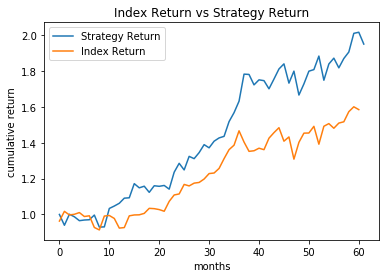

In [254]:
fig, ax = plt.subplots()
plt.plot((1+pflio(return_df,6,3)).cumprod())
plt.plot((1+DJI["mon_ret"][2:].reset_index(drop=True)).cumprod())
plt.title("Index Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","Index Return"])

### 6.2 Momentum Strategy
Also called divergence or trend trading. When we follow this strategy, we believe the movement of a quantity will continue in its current direction; i.e if it is moving up then it will keep on moving up and same with down. Some examples are: <br>
- Moving average crossover: Crossover occurs when the price of an asset moves from one side of a moving average to the other, this crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market.
- Dual moving average crossover: Crossover occurs when a short-term average crosses a long-term average. When the short-term average crosses the long-term average, buy signal is triggered.
- Turtle trading: The basic strategy is to buy futures on a 20-day high and sell on a 20-day low.

#### Data Extraction & Manipulation
We will implement this strategy only for the Apple stock. It is important to select which stock to use for this strategy.

In [255]:
short_window=40
long_window=100
DMC_signals = pd.DataFrame()
DMC_signals=(Dual_Moving_Crossover(df_AAPL,short_window,long_window))
DMC_signals['signal']= 0.0
DMC_signals['signal'][short_window:] = np.where(DMC_signals['short_mavg'][short_window:]>DMC_signals['long_mavg'][short_window:], 1.0, 0.0)   
DMC_signals['positions'] = DMC_signals['signal'].diff()
DMC_signals.dropna(inplace=True)
print(DMC_signals)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2014-10-07  100.120003   98.730003   99.430000   98.750000  42094200.0   
2014-10-08  101.110001   98.309998   98.760002  100.800003  57404700.0   
2014-10-09  102.379997  100.610001  101.540001  101.019997  77376500.0   
2014-10-10  102.029999  100.300003  100.690002  100.730003  66331600.0   
2014-10-13  101.779999   99.809998  101.330002   99.809998  53583400.0   
...                ...         ...         ...         ...         ...   
2020-01-23  319.559998  315.649994  317.920013  319.230011  26118000.0   
2020-01-24  323.329987  317.519989  320.250000  318.309998  36634400.0   
2020-01-27  311.769989  304.880005  310.059998  308.950012  40485000.0   
2020-01-28  318.399994  312.190002  312.600006  317.690002  40558500.0   
2020-01-29  327.850006  321.380005  324.450012  324.339996  54057300.0   

             Adj Close  short_mavg   

In [256]:
DMC_signals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337 entries, 2014-10-07 to 2020-01-29
Data columns (total 10 columns):
High          1337 non-null float64
Low           1337 non-null float64
Open          1337 non-null float64
Close         1337 non-null float64
Volume        1337 non-null float64
Adj Close     1337 non-null float64
short_mavg    1337 non-null float64
long_mavg     1337 non-null float64
signal        1337 non-null float64
positions     1337 non-null float64
dtypes: float64(10)
memory usage: 114.9 KB


In [257]:
count1=0
count2=0
count3=0
for index, row in DMC_signals.iterrows():
    if(row['positions']==0.0):
        count1=count1+1
    elif(row['positions']==1.0):
        count2=count2+1
    else:
        count3=count3+1
print(count1,count2,count3)

1326 6 5


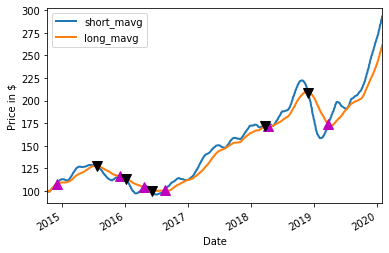

In [258]:
fig = plt.figure()

ax1 = fig.add_subplot(111,  ylabel='Price in $')
DMC_signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(DMC_signals.loc[DMC_signals.positions == 1.0].index, 
         DMC_signals.short_mavg[DMC_signals.positions == 1.0],
         '^', markersize=10, color='m')    
# Plot the sell signals
ax1.plot(DMC_signals.loc[DMC_signals.positions == -1.0].index, 
         DMC_signals.short_mavg[DMC_signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

#### Implementation

In [260]:
initial_capital= float(100000.0)
# Buy a 120 shares
positions['AAPL'] = 120*DMC_signals['signal']   
portfolio = positions.multiply(df_AAPL['Adj Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.dropna(inplace=True)
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2014-10-07   0.0       0.0  100000.0  100000.0      0.0
2014-10-08   0.0       0.0  100000.0  100000.0      0.0
2014-10-09   0.0       0.0  100000.0  100000.0      0.0
2014-10-10   0.0       0.0  100000.0  100000.0      0.0
2014-10-13   0.0       0.0  100000.0  100000.0      0.0


#### Evaluation

In [270]:
def CAGR_DCM(df):
    df2=df.copy()
    days = (df2.index[-1] - df2.index[0]).days
    cagr = ((((df2['total'][-1]) / df2['total'][1])) ** (365.0/days)) - 1
    return cagr

def volatility_DCM(df):
    df2=df.copy()
    df2['daily returns']=df2['total'].pct_change()
    vol=df2['daily returns'].std() * np.sqrt(252)
    return vol

def sharpe_DCM(df,rf):
    sharpe_ratio = (CAGR_DCM(df)-rf) / volatility_DCM(df)
    return sharpe_ratio
# def max_drawdown_DCM(df):
#     df2=df.copy()
#     df2['daily returns']=df2['Adj Close'].pct_change()
#     df2['cum returns']=(1+df2['daily returns']).cumprod()
#     df2['cum roll max']= df2['cum returns'].cummax()
#     df2['drawdown']=df2['cum roll max']-df2['cum returns']
#     df2['drawdown_pct']=df2['drawdown']/df2['cum roll max']
#     max_dd=df2['drawdown'].max()
#     return max_dd
round(CAGR_DCM(portfolio),2), round(volatility_DCM(portfolio),2) , round(sharpe_DCM(portfolio,0.025),2)

(0.04, 0.04, 0.42)

#### Visualization 

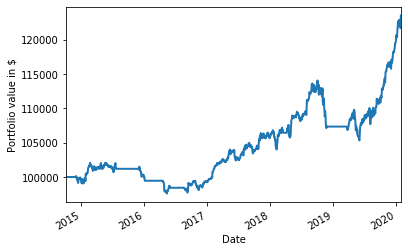

In [271]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)
plt.show()

### 6.3 Intraday Resistance Breakout Strategy
In this strategy, we define a resistance level and trade when the stock breaks out of that resistance level. We choose high volume & high activity stocks for this strategy. We have to define 2 things for this strategy, <br>
- Breakout rule: When price breaches the 20 period rolling min/max. <br>
- Exit/Stop-Loss Signal: Price +/- 20 period ATR.

#### Data Extraction & Manipulation

In [274]:
tickers = ["MSFT","AAPL","FB","AMZN","INTC", "CSCO","VZ","IBM","QCOM","LYFT"]
ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')
attempt = 0 # initializing passthrough variable
drop = [] # initializing list to store tickers whose close price was successfully extracted
while len(tickers) != 0 and attempt <=5:
    tickers = [j for j in tickers if j not in drop]
    for i in range(len(tickers)):
        try:
            ohlc_intraday[tickers[i]] = ts.get_intraday(symbol=tickers[i],interval='5min', outputsize='full')[0]
            ohlc_intraday[tickers[i]].columns = ["Open","High","Low","Adj Close","Volume"]
            drop.append(tickers[i])      
        except:
            print(tickers[i]," :failed to fetch data...retrying")
            continue
    attempt+=1
tickers = ohlc_intraday.keys()

LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying
LYFT  :failed to fetch data...retrying


In [289]:
tickers

dict_keys(['MSFT', 'AAPL', 'FB', 'AMZN', 'INTC', 'CSCO', 'VZ', 'IBM', 'QCOM'])

We couldn't get data for LYFT.

In [290]:
ohlc_intraday['MSFT']

,Open,High,Low,Adj Close,Volume
date,,,,,
2020-03-27 16:00:00,149.2700,150.0900,149.2601,149.6100,2849557.0
2020-03-27 15:55:00,151.6400,151.6400,149.2800,149.3000,2026541.0
2020-03-27 15:50:00,152.3850,152.9200,151.3638,151.5900,745754.0
2020-03-27 15:45:00,153.3300,153.3950,152.0000,152.4000,759371.0
2020-03-27 15:40:00,153.8900,153.8900,152.9100,153.3300,569807.0
...,...,...,...,...,...
2020-03-09 10:05:00,155.1400,155.5000,154.0011,154.0800,1276377.0
2020-03-09 10:00:00,154.7000,156.9900,154.4400,155.1200,1777208.0
2020-03-09 09:55:00,150.5050,155.0350,150.5050,154.8200,1962783.0


In [291]:
ohlc_dict = copy.deepcopy(ohlc_intraday)
tickers_signal = {}
tickers_ret = {}
for ticker in tickers:
    ohlc_dict[ticker] = ATR(ohlc_dict[ticker],20)
    ohlc_dict[ticker]["roll_max_cp"] = ohlc_dict[ticker]["High"].rolling(20).max()
    ohlc_dict[ticker]["roll_min_cp"] = ohlc_dict[ticker]["Low"].rolling(20).min()
    ohlc_dict[ticker]["roll_max_vol"] = ohlc_dict[ticker]["Volume"].rolling(20).max()
    ohlc_dict[ticker].dropna(inplace=True)
    tickers_signal[ticker] = ""
    tickers_ret[ticker] = []
ohlc_dict['MSFT'] 

,Open,High,Low,Adj Close,Volume,TR,ATR,roll_max_cp,roll_min_cp,roll_max_vol
date,,,,,,,,,,
2020-03-27 12:45:00,152.2000,152.3810,151.9700,152.3700,214899.0,0.6210,0.668825,154.045,151.6520,575191.0
2020-03-27 12:40:00,152.1000,152.3200,152.0100,152.1866,323443.0,0.3600,0.665075,153.800,151.6520,575191.0
2020-03-27 12:35:00,151.3600,152.1600,151.1001,152.0462,362394.0,1.0865,0.675170,153.800,151.1001,575191.0
2020-03-27 12:30:00,151.4000,151.7200,151.3300,151.3300,290662.0,0.7162,0.682980,153.800,151.1001,575191.0
2020-03-27 12:25:00,151.7156,151.7156,151.1600,151.4500,262602.0,0.5556,0.681960,153.800,151.1001,575191.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-09 10:05:00,155.1400,155.5000,154.0011,154.0800,1276377.0,3.4789,1.751345,157.750,153.4804,1298444.0
2020-03-09 10:00:00,154.7000,156.9900,154.4400,155.1200,1777208.0,2.9100,1.835845,157.750,153.4804,1777208.0
2020-03-09 09:55:00,150.5050,155.0350,150.5050,154.8200,1962783.0,4.6150,1.991065,157.750,150.5050,1962783.0


#### Implementation

In [292]:
for ticker in tickers:
    for i in range(len(ohlc_dict[ticker])):
        if tickers_signal[ticker] == "":
            tickers_ret[ticker].append(0)
            if ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
        
        elif tickers_signal[ticker] == "Buy":
            if ohlc_dict[ticker]["Adj Close"][i]<ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append(((ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1])/ohlc_dict[ticker]["Adj Close"][i-1])-1)
            elif ohlc_dict[ticker]["Low"][i]<=ohlc_dict[ticker]["roll_min_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Sell"
                tickers_ret[ticker].append(((ohlc_dict[ticker]["Adj Close"][i-1] - ohlc_dict[ticker]["ATR"][i-1])/ohlc_dict[ticker]["Adj Close"][i-1])-1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i]/ohlc_dict[ticker]["Adj Close"][i-1])-1)
                
        elif tickers_signal[ticker] == "Sell":
            if ohlc_dict[ticker]["Adj Close"][i]>ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]:
                tickers_signal[ticker] = ""
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/(ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]))-1)
            elif ohlc_dict[ticker]["High"][i]>=ohlc_dict[ticker]["roll_max_cp"][i] and \
               ohlc_dict[ticker]["Volume"][i]>1.5*ohlc_dict[ticker]["roll_max_vol"][i-1]:
                tickers_signal[ticker] = "Buy"
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/(ohlc_dict[ticker]["Adj Close"][i-1] + ohlc_dict[ticker]["ATR"][i-1]))-1)
            else:
                tickers_ret[ticker].append((ohlc_dict[ticker]["Adj Close"][i-1]/ohlc_dict[ticker]["Adj Close"][i])-1)
                
    ohlc_dict[ticker]["ret"] = np.array(tickers_ret[ticker])


#### Evaluation

In [293]:
def CAGR_RB(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    n = len(df)/(252*78)
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility_RB(DF):
    df = DF.copy()
    vol = df["ret"].std() * np.sqrt(252*78)
    return vol

def sharpe_RB(DF,rf):
    df = DF.copy()
    sharpe = (CAGR_RB(df) - rf)/volatility_RB(df)
    return sharpe
    

def max_dd_RB(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd


strategy_df = pd.DataFrame()
for ticker in tickers:
    strategy_df[ticker] = ohlc_dict[ticker]["ret"]
strategy_df["ret"] = strategy_df.mean(axis=1)
round(CAGR_RB(strategy_df),2), round(sharpe_RB(strategy_df,0.025),2), round(max_dd_RB(strategy_df),2) 

(-0.14, -0.92, 0.05)

#### Visualization

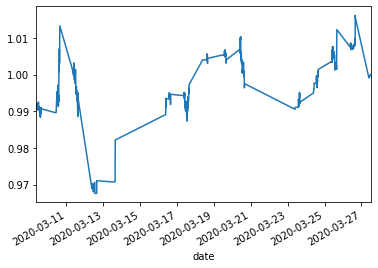

In [294]:
(1+strategy_df["ret"]).cumprod().plot()

### 6.4 Intraday Renko & OBV


### Reversion Strategy
Also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. 
- Mean-Reversion: We believe that the stocks will return to their mean and that you can exploit when it deviates from that mean.
- Pairs Trading Mean-Reversion: States that if two stocks have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other.

### Bollinger Bands and ATR 
Also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. 
- Mean-Reversion: We believe that the stocks will return to their mean and that you can exploit when it deviates from that mean.
- Pairs Trading Mean-Reversion: States that if two stocks have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other.